# GLM Basis Functions

In [1]:
import cedalion
import cedalion.models.glm.basis_functions as bf
import cedalion.models.glm.design_matrix as dm

import cedalion.dataclasses as cdc

import matplotlib.pyplot as p
import numpy as np
import xarray as xr
import matplotlib.pyplot as p
import cedalion.datasets

units = cedalion.units

xr.set_options(display_expand_data=False)

In [2]:
# dummy time series
fs = 8.0
ts = cdc.build_timeseries(
    np.random.random((100, 1, 2)),
    dims=["time", "channel", "chromo"],
    time=np.arange(100) / fs,
    channel=["S1D1"],
    value_units=units.uM,
    time_units=units.s,
    other_coords={'chromo' : ["HbO", "HbR"]}
)
display(ts)

<xarray.DataArray (time: 100, channel: 1, chromo: 2)> Size: 2kB
[µM] 0.1038 0.07161 0.06698 0.6239 0.9578 ... 0.3422 0.7857 0.1391 0.883 0.7571
Coordinates:
  * time     (time) float64 800B 0.0 0.125 0.25 0.375 ... 12.0 12.12 12.25 12.38
    samples  (time) int64 800B 0 1 2 3 4 5 6 7 8 ... 91 92 93 94 95 96 97 98 99
  * channel  (channel) <U4 16B 'S1D1'
  * chromo   (chromo) <U3 24B 'HbO' 'HbR'

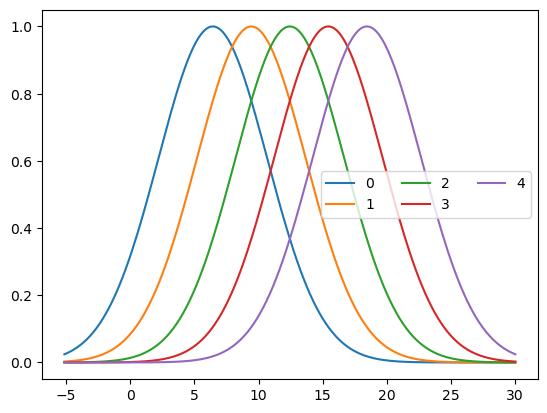

In [3]:
basis = bf.GaussianKernels(
    t_pre=5 * units.s,
    t_post=30 * units.s,
    t_delta=3 * units.s,
    t_std=3 * units.s,
)
hrf = basis(ts)

p.figure()
for i_comp, comp in enumerate(hrf.component.values):
    p.plot(hrf.time, hrf[:, i_comp], label=comp)
p.legend(ncols=3)

<xarray.DataArray (time: 98, component: 1, chromo: 2)> Size: 2kB
0.0 0.0 0.0 0.0 0.0 0.0 ... 7.789e-06 8.836e-08 4.894e-06 5.155e-08 3.05e-06
Coordinates:
  * time     (time) float64 784B 0.0 0.125 0.25 0.375 ... 11.75 11.88 12.0 12.12
  * chromo   (chromo) <U3 24B 'HbO' 'HbR'
Dimensions without coordinates: component

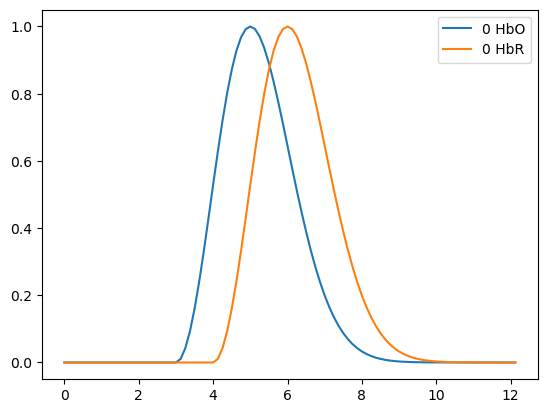

In [4]:
basis = bf.Gamma(
    tau={"HbO": 3 * units.s, "HbR": 4 * units.s},
    sigma=2 * units.s,
    T=0 * units.s,
)
hrf = basis(ts)
display(hrf)
p.figure()
for i_comp, comp in enumerate(hrf.component.values):
    for i_chromo, chromo in enumerate(hrf.chromo.values):
        p.plot(hrf.time, hrf[:, i_comp, i_chromo], label=f"{comp} {chromo}")

p.legend()

<xarray.DataArray (time: 106, component: 1, chromo: 2)> Size: 2kB
0.0 0.0 0.0005512 0.0005512 0.00273 ... 4.08e-07 4.08e-07 2.491e-07 2.491e-07
Coordinates:
  * time     (time) float64 848B 0.0 0.125 0.25 0.375 ... 12.75 12.88 13.0 13.12
  * chromo   (chromo) <U3 24B 'HbO' 'HbR'
Dimensions without coordinates: component

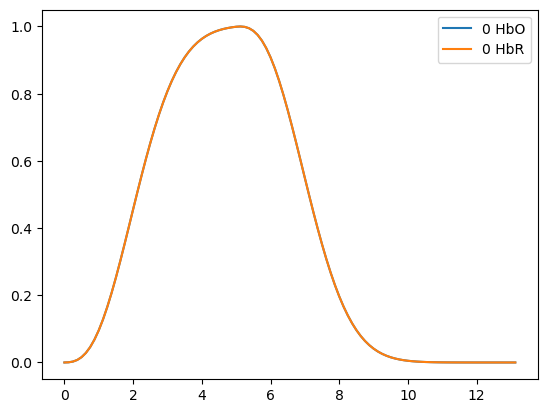

In [5]:
basis = bf.Gamma(
    tau=0 * units.s,
    sigma=2 * units.s,
    T=5 * units.s,
)
hrf = basis(ts)
display(hrf)

p.figure()
for i_comp, comp in enumerate(hrf.component.values):
    for i_chromo, chromo in enumerate(hrf.chromo.values):
        p.plot(hrf.time, hrf[:, i_comp, i_chromo], label=f"{comp} {chromo}")

p.legend()